In [190]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt


In [ ]:
# трехмерные точки и линии

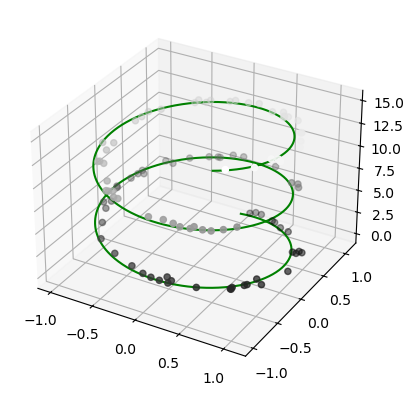

In [83]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

z1 = np.linspace(0,15,1000)
y1 = np.cos(z)
x1 = np.sin(z)

ax.plot3D(x1,y1,z1,c='green') # линии

z2 = 15 * np.random.random(100)
y2 = np.cos(z2) + 0.1 * np.random.random(100)
x2 = np.sin(z2) + 0.1 * np.random.random(100)

ax.scatter3D(x2,y2,z2, c=z2, cmap = 'grey')

plt.show()

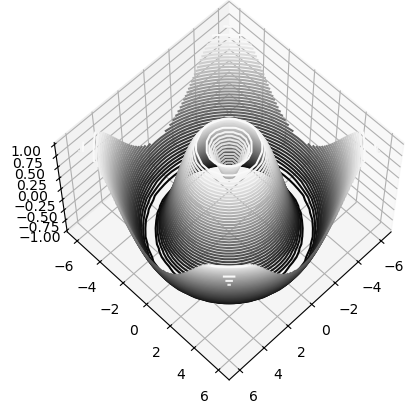

In [89]:
def f(x,y):
    return np.sin(np.sqrt(x**2+y**2))

x = np.linspace(-6,6,30)
y = np.linspace(-6,6,30)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

ax = plt.axes(projection = '3d')
ax.contour3D(X,Y,Z,40,cmap='grey')

ax.view_init(60) # поворот относительно плоскости xy
ax.view_init(60, 45) # поворот относительно оси z

plt.show() 

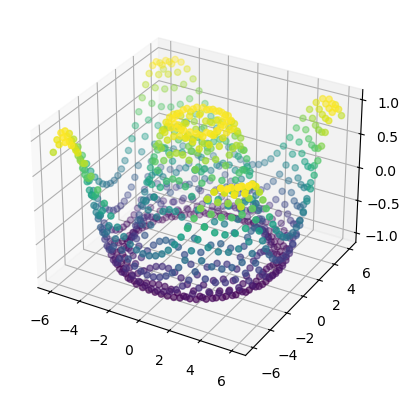

In [125]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(X, Y, Z,c=Z)
plt.show()

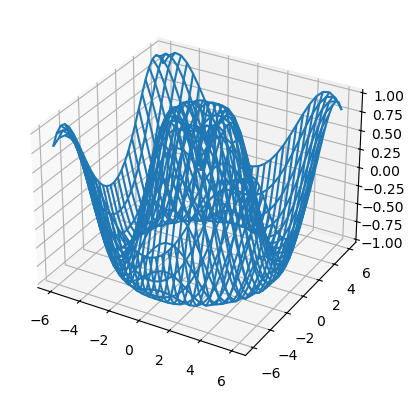

In [119]:
# каркасный метод

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X,Y,Z)
plt.show()

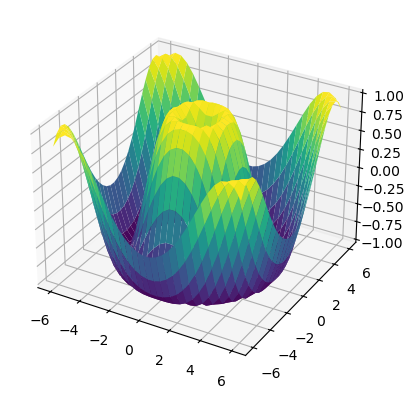

In [135]:
# поверхностный метод

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,Z,cmap='viridis', edgecolor='none')
plt.show()

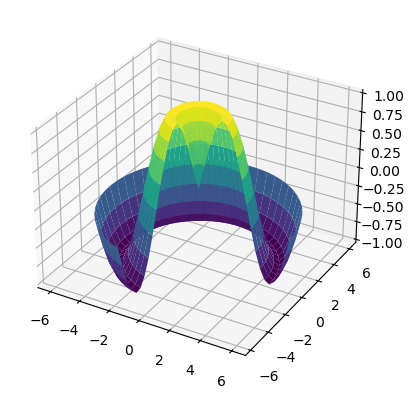

In [147]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9*np.pi, 0.5*np.pi, 40)

R, Theta = np.meshgrid(r, theta)
X = r * np.sin(Theta)
Y = r * np.cos(Theta)
Z = f(X,Y)

ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

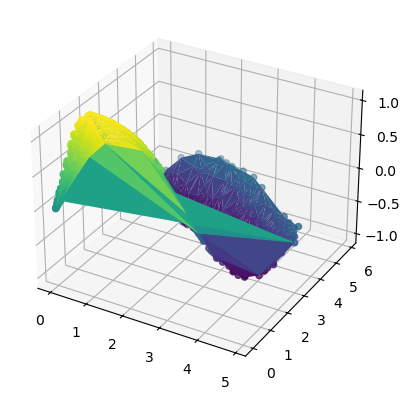

In [162]:
# объединение точек (триангуляция)

fig = plt.figure()
ax = plt.axes(projection = '3d')
    
r = 6 * np.random.random(1000)
theta = 2 * np.pi + np.random.random(1000)

x = r * np.sin(theta)
y = r * np.cos(theta)
z = f(x,y)

ax.scatter(x, y, z, c=z, cmap='viridis')
ax.plot_trisurf(x, y, z, cmap='viridis')

plt.show()

In [192]:
# Seaborn - позволяет строить данные из Pandas
# - DataFrame (MathPlotLib с Pandas)
# - более восокоуровневый
import seaborn as sns

In [180]:
data = np.random.multivariate_normal([0,5],[[5,2],[2,2]], size = 2000)
data = pd.DataFrame(data, columns = ['x','y'])

print (data.head())

          x         y
0  3.719644  7.008073
1 -3.691279  5.656592
2 -2.479120  3.595824
3  4.493608  7.538464
4  0.536087  5.732441


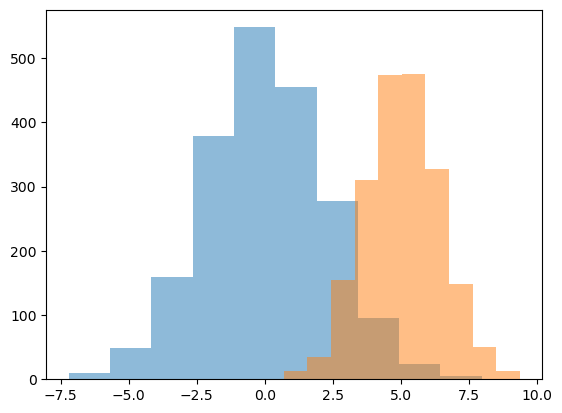

In [184]:
fig = plt.figure()
plt.hist(data['x'], alpha = 0.5)
plt.hist(data['y'], alpha = 0.5)

plt.show() 

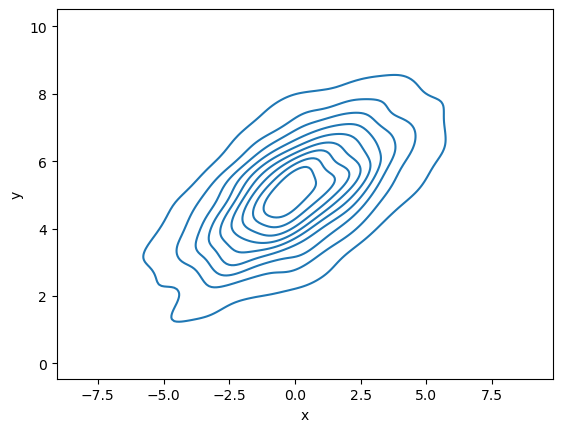

In [198]:
# с помощью Seaborn получаем
fig = plt.figure()
sns.kdeplot(data=data, x='x', y='y')
plt.show() 

C:\Users\defen\AppData\Local\Temp\ipykernel_11092\3286966363.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, shade = True)


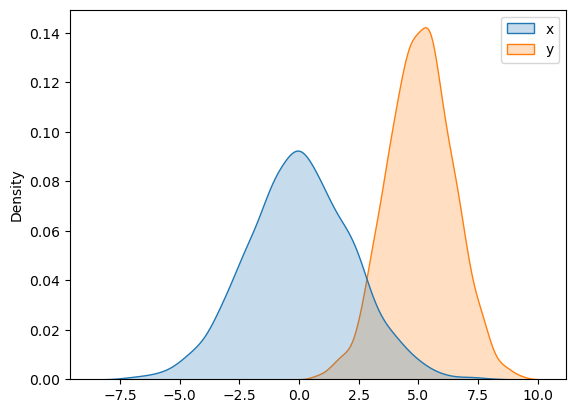

In [200]:
fig = plt.figure()
sns.kdeplot(data=data, shade = True)
plt.show() 

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


<Figure size 640x480 with 0 Axes>

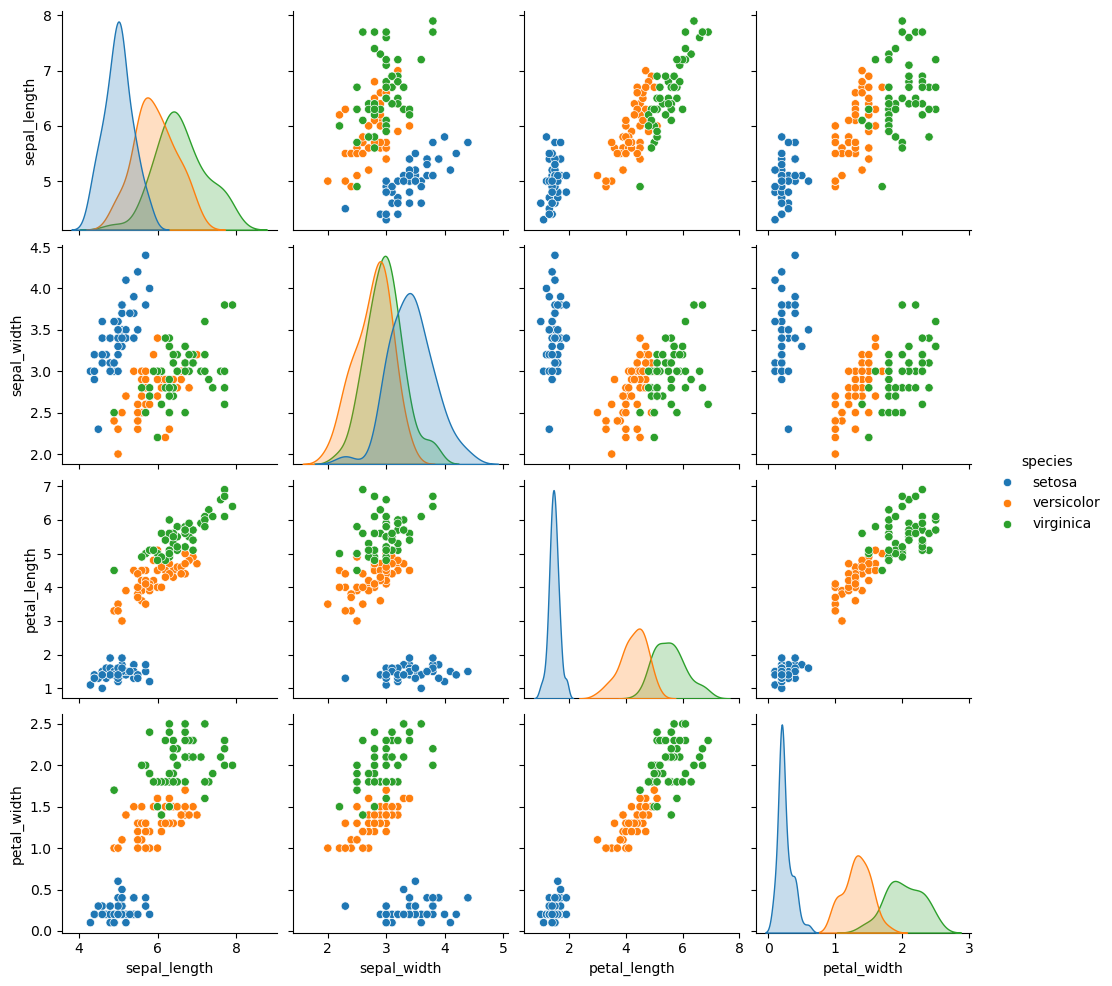

In [207]:
# sns.pairplot()

fig = plt.figure()

iris = sns.load_dataset('iris') 
print(iris.head())

sns.pairplot(iris, hue='species') # сравнить попарно значения столбцов
plt.show()                        # hue = 'species' - позволяет выделить элементы групп
                                  #                   расцветкой 'species'

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


<Figure size 640x480 with 0 Axes>

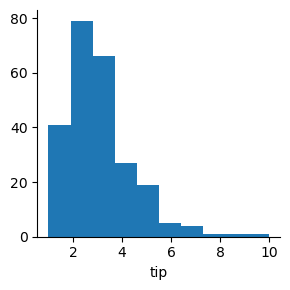

In [221]:
# sns.FacetGrid()

fig = plt.figure()

tips = sns.load_dataset('tips') 
print(tips.head())

grid = sns.FacetGrid(tips) # гистограммы подмножеств, сюда кладутся данные
grid.map(plt.hist, 'tip')  # вытащили гистограмму чаевых
plt.show() 

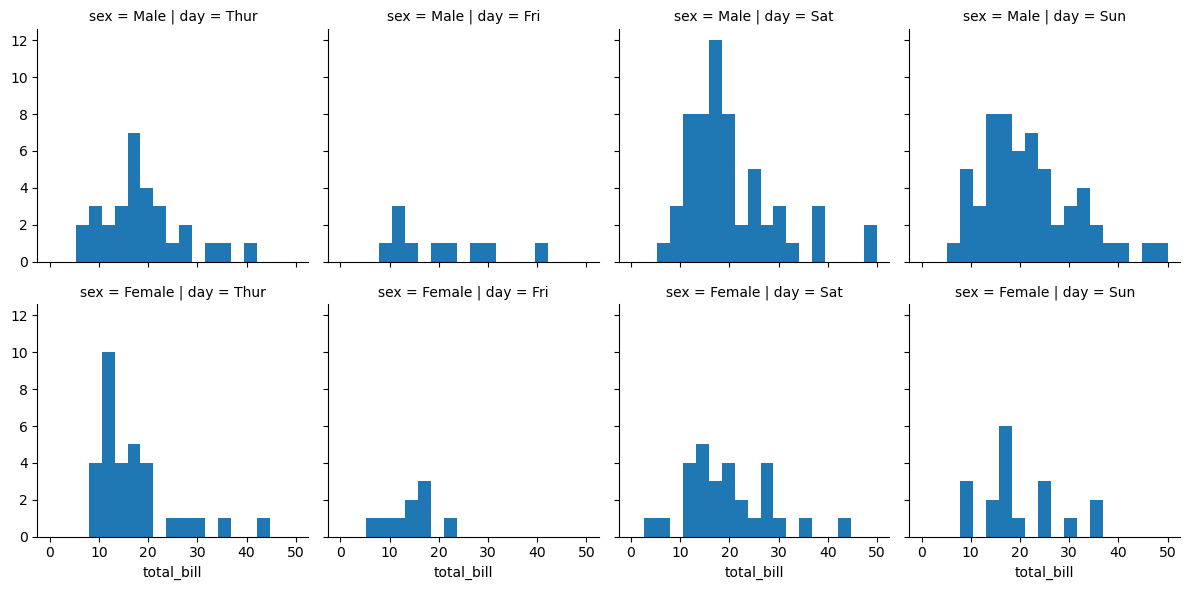

In [243]:
grid = sns.FacetGrid(tips, row = 'sex', col = 'day') # row - разделение по значениям в строки
grid.map(plt.hist, 'total_bill', bins = np.linspace(0,50,20))                            # col - разделение по столбцам
plt.show() 

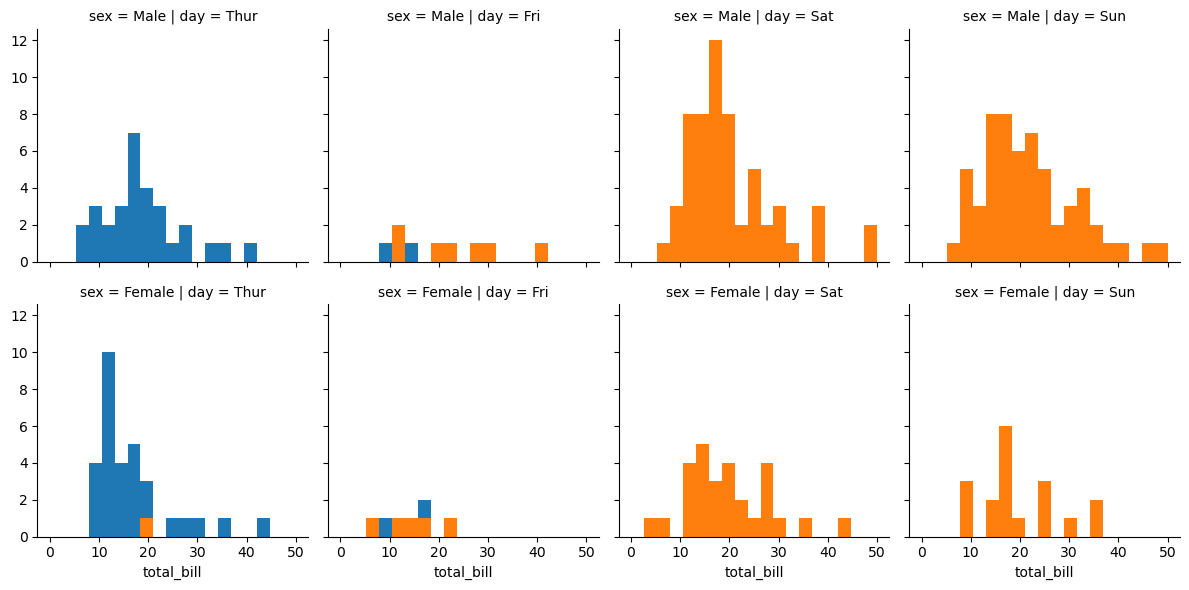

In [241]:
grid = sns.FacetGrid(tips, row = 'sex', col = 'day', hue = 'time') # выделили время
grid.map(plt.hist, 'total_bill', bins = np.linspace(0,50,20))                             
plt.show() 

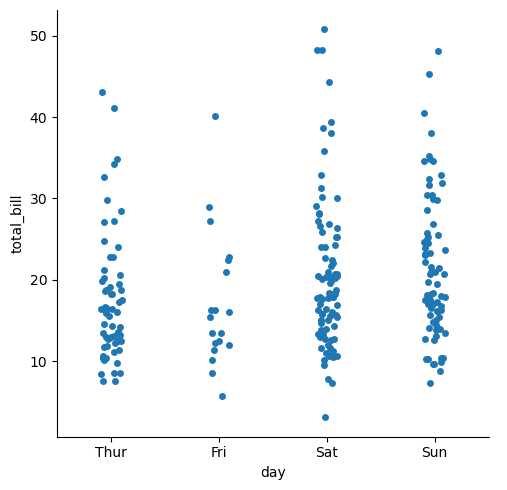

In [245]:
# sns.catplot()
sns.catplot(data = tips, x='day', y='total_bill')
plt.show() 

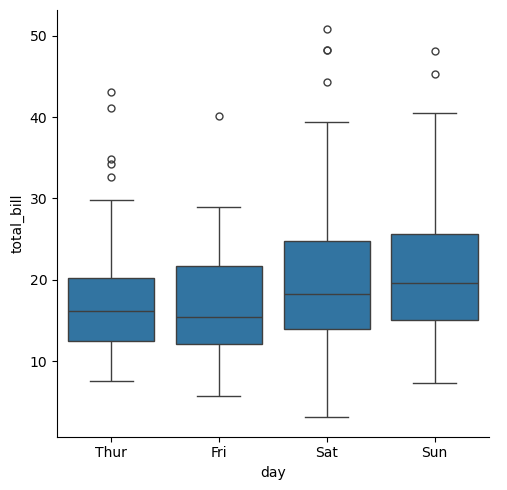

In [249]:
# ящик с усиками
sns.catplot(data = tips, x='day', y='total_bill', kind='box')
plt.show() 

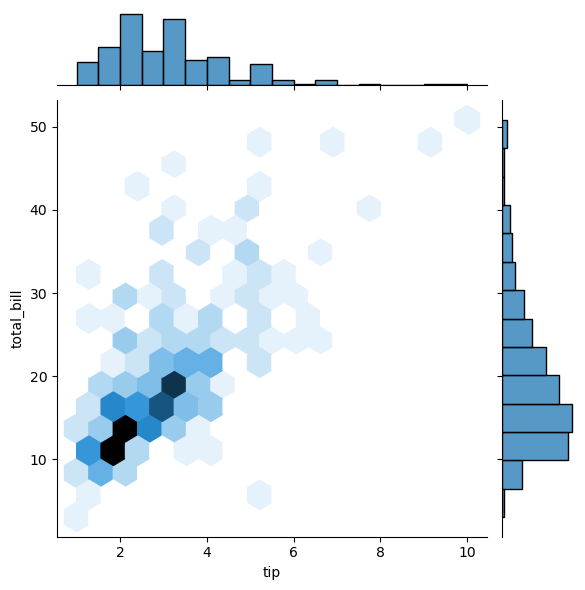

In [265]:
# совместное распределение между различными наборами данных
# ТОЛЬКО числовые значения
sns.jointplot(data=tips, x='tip', y='total_bill', kind='hex') 
plt.show() 

In [267]:
planets = sns.load_dataset('planets')
print(planets.head())

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009


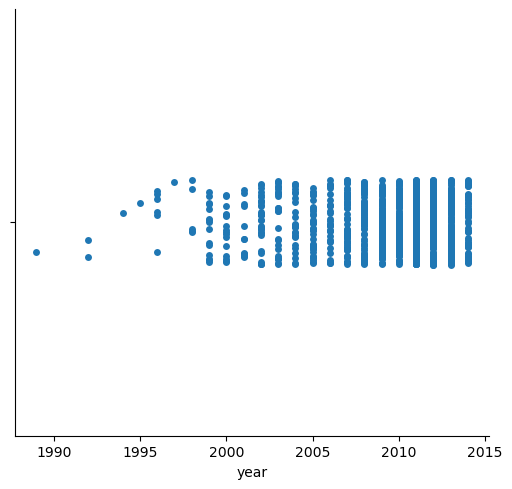

In [269]:
sns.catplot(data = planets, x='year', kind='strip')
plt.show() 

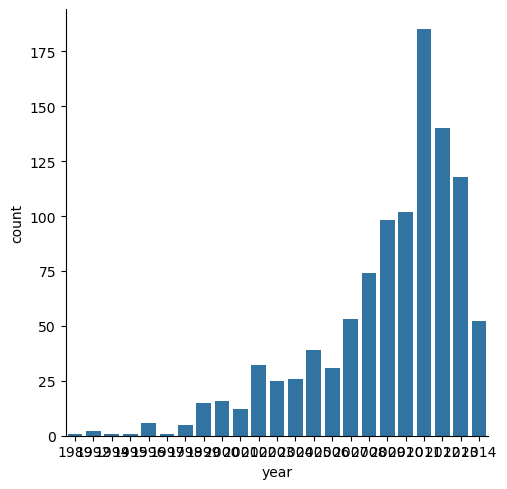

In [285]:
# count - количество записей
sns.catplot(data = planets, x='year', kind='count')
plt.show() 

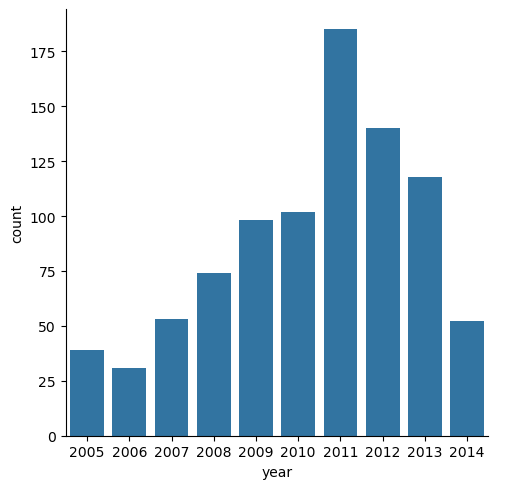

In [287]:
# order - диапазон с 2005 по 2015 год
sns.catplot(data = planets, x='year', kind='count', order=range(2005, 2015))
plt.show() 

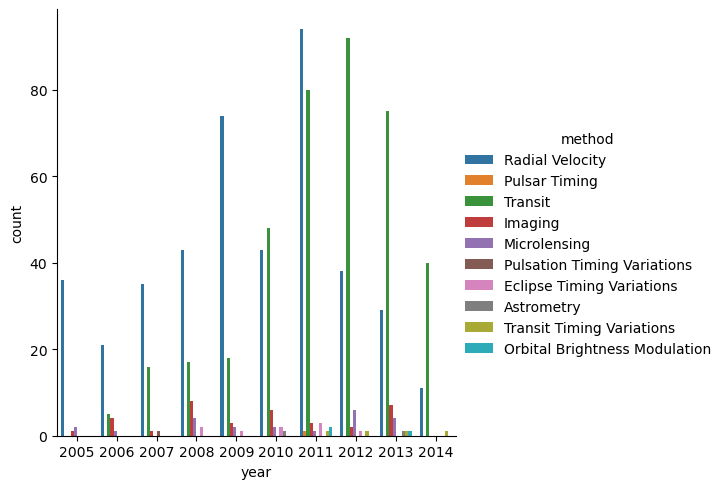

In [288]:
# раскрасили по категории "методы" с помощью hue
sns.catplot(data = planets, x='year', kind='count', order=range(2005, 2015), hue = 'method') 
plt.show() 

In [296]:
# Сравнение ЧИСЛОВЫХ данных

tips = sns.load_dataset('tips') 
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


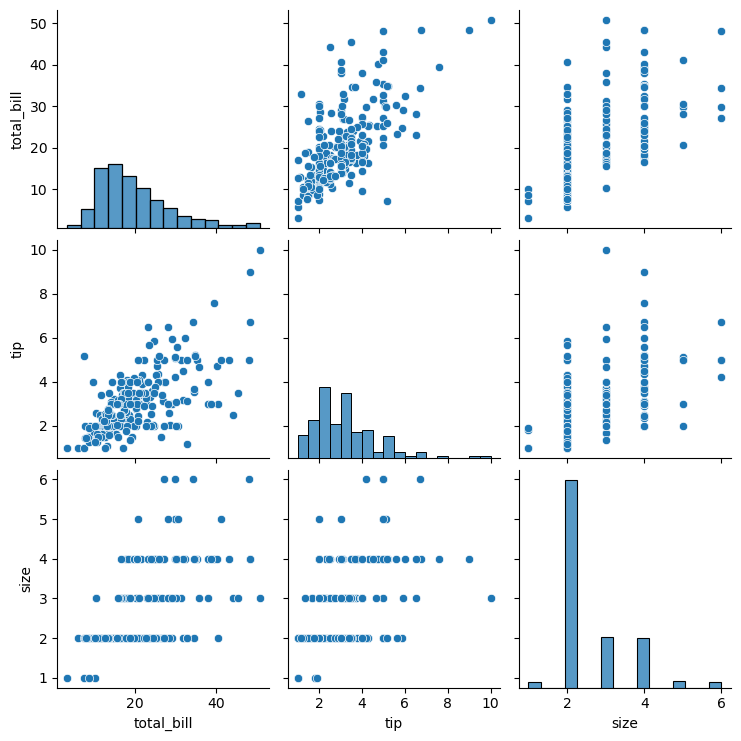

In [294]:
## Числовые пары
sns.pairplot(tips)
plt.show() 

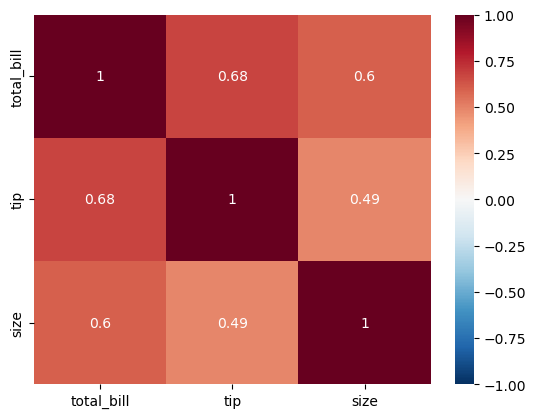

In [312]:
## Тепловая карта
tips_corr = tips[['total_bill', 'tip', 'size']]
# .corr - считаем корреляцию
# 0 - независимо
# 1 - прямо-пропорциональная зависимость
# 2 - обратно-пропорциональная зависимость
# annot - пишет внутри ячейки значение
sns.heatmap(tips_corr.corr(), cmap = 'RdBu_r', annot=True, vmin = -1, vmax = 1)
plt.show() 

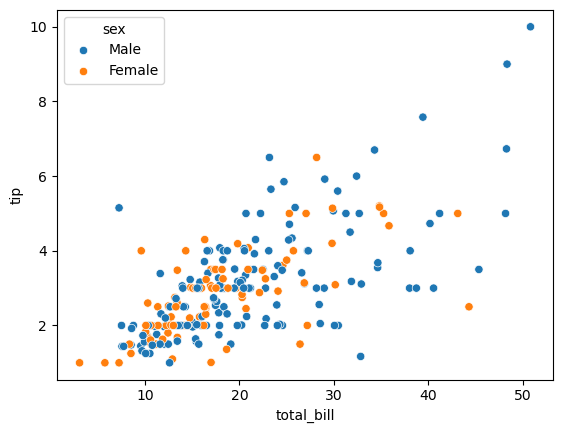

In [314]:
## Диаграмма рассеяния
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.show()

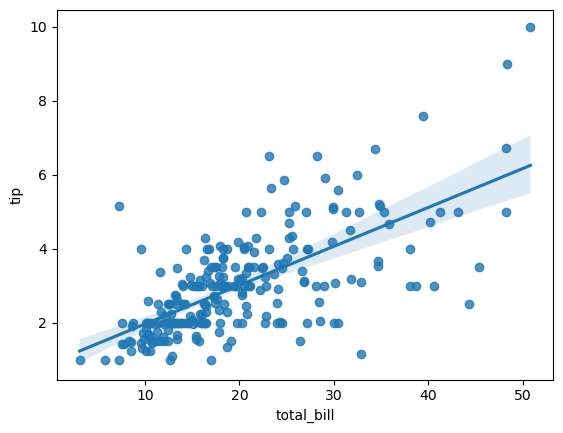

In [318]:
# добавим линейнию регрессию
sns.regplot(data=tips, x='total_bill', y='tip')
plt.show()

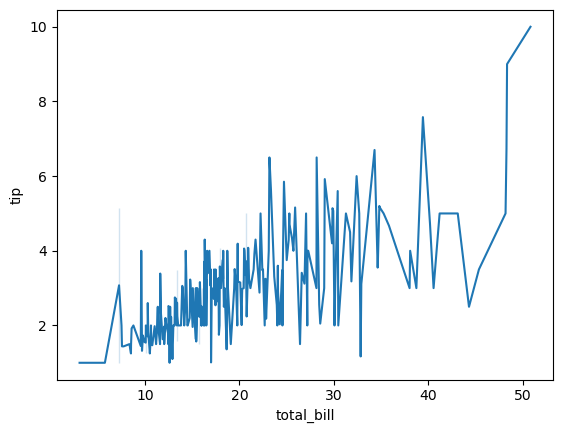

In [320]:
## Линейный график - можно соединить линией точки
sns.lineplot(data=tips, x='total_bill', y='tip')
plt.show()

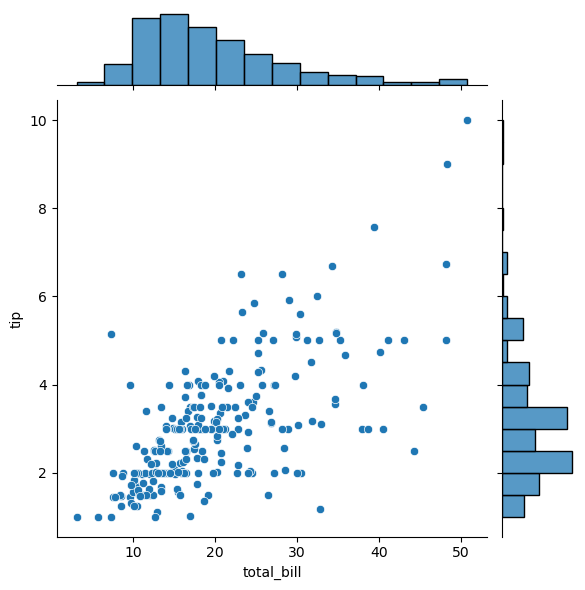

In [326]:
## Сводная диаграмма
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.show()

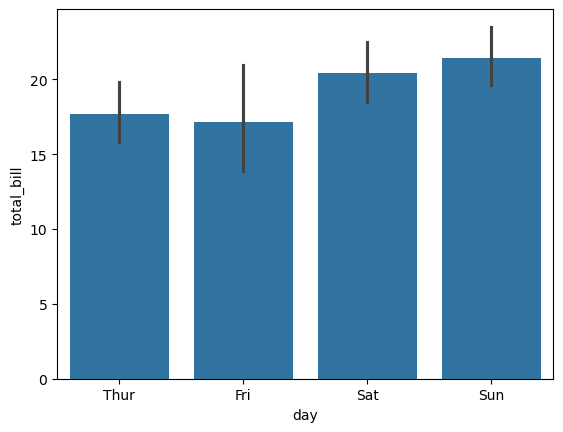

In [330]:
# Сравнение ЧИСЛОВЫХ и КАТЕГОРИАЛЬНЫХ данных
sns.barplot(data=tips, x='day', y='total_bill')
plt.show()

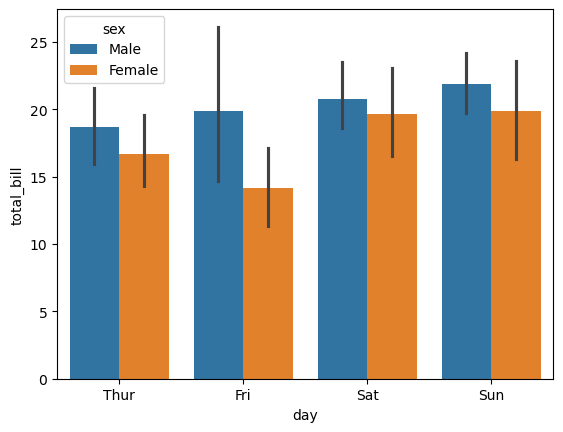

In [332]:
# добавим разделение hue='sex'
sns.barplot(data=tips, x='day', y='total_bill', hue='sex')
plt.show()

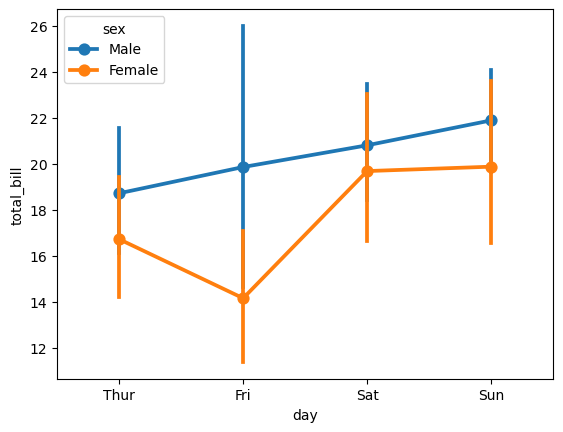

In [342]:
# вместо столбов можно отобразить точки
sns.pointplot(data=tips, x='day', y='total_bill', hue='sex')
plt.show()

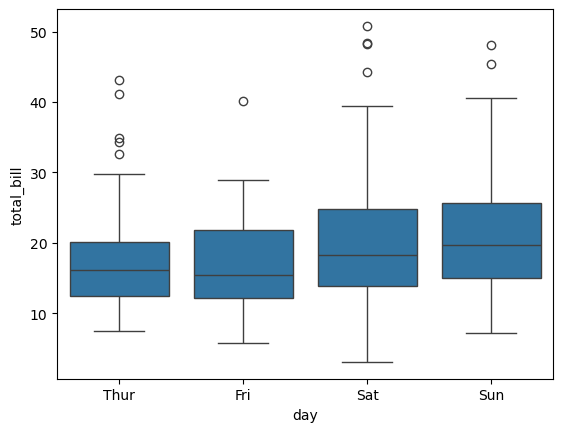

In [346]:
# ящик с усами
sns.boxplot(data=tips, x='day', y='total_bill')
plt.show()

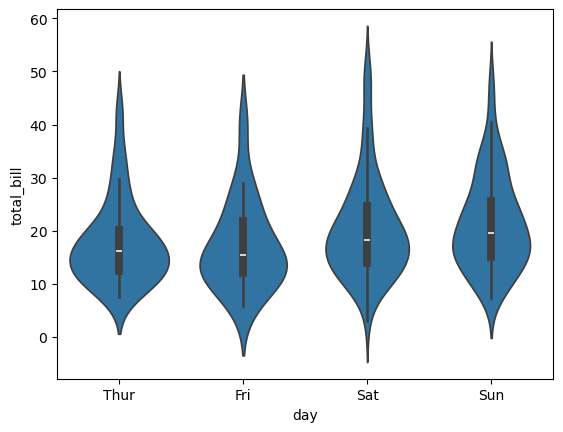

In [348]:
# Скрипичная диаграмма - ящик с усами + ядерная оценка плотности
sns.violinplot(data=tips, x='day', y='total_bill')
plt.show()

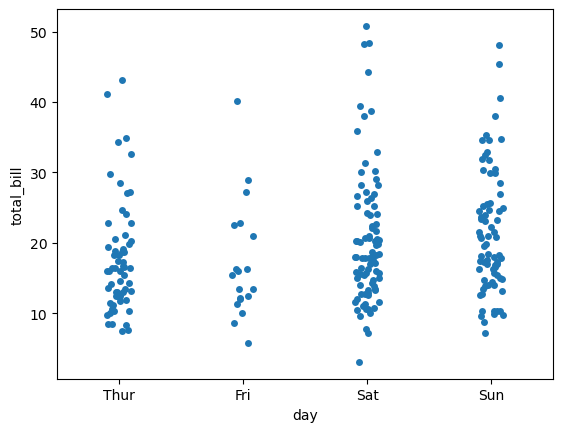

In [352]:
# Одномерная диаграмма рассеяния
sns.stripplot(data=tips, x='day', y='total_bill')
plt.show()